Вариант 8

In [25]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

**Задание 1**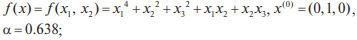

In [17]:
import numpy as np

def f(x):
    return x[0]**4 + x[1]**2 + x[2]**2 + x[0]*x[1] + x[1]*x[2]

def gradient(x):
    df_dx1 = 4 * x[0]**3 + x[1]
    df_dx2 = 2 * x[1] + x[0] + x[2]
    df_dx3 = 2 * x[2] + x[1]
    return np.array([df_dx1, df_dx2, df_dx3])

def line_search(x, direction, alpha, c, rho, max_iter):
    for _ in range(max_iter):
        y = -c * gradient(x)
        if f(x + alpha * y) <= f(x) + rho * alpha * np.dot(gradient(x), y):
            return alpha
        alpha *= 0.5  
    return alpha

def gradient_descent(x, learning_rate, epsilon, max_iterations):
    iteration = 0
    c = 1  
    rho = 0.5  
    
    while iteration < max_iterations:
        grad = gradient(x)
        alpha = line_search(x, -grad, learning_rate, c, rho, max_iter=100)
        x_new = x + alpha * (-grad)
        
        if np.linalg.norm(grad) < epsilon:
            break
        
        x = x_new
        iteration += 1

    return x_new, f(x_new)

x_0 = np.array([0, 1, 0])
learning_rate = 0.1
epsilon = 0.01
max_iterations = 100

x_min, f_min = gradient_descent(x_0, learning_rate, epsilon, max_iterations)

print(f"Минимум достигается в точке: {x_min}")
print(f"Значение функции в этой точке: {f_min}")


Минимум достигается в точке: [-0.41560459  0.28290175 -0.14379394]
Значение функции в этой точке: -0.027710048677255066


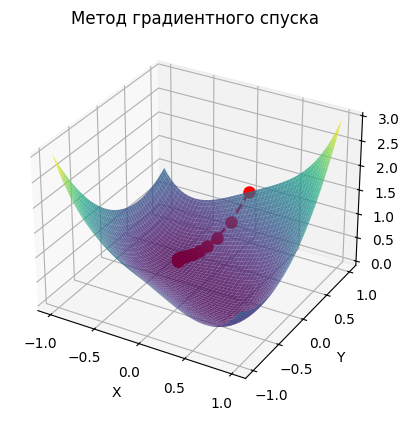

In [18]:
def line_search(x, direction, alpha, c, rho, max_iter):
    for _ in range(max_iter):
        y = -c * gradient(x)
        if f(x + alpha * y) <= f(x) + rho * alpha * np.dot(gradient(x), y):
            return alpha
        alpha *= 0.5  
    return alpha

def gradient_descent(x, learning_rate, epsilon, max_iterations):
    iteration = 0
    c = 1  
    rho = 0.5  
    trajectory = [x] 
    while iteration < max_iterations:
        grad = gradient(x)
        alpha = line_search(x, -grad, learning_rate, c, rho, max_iter=100)
        x_new = x + alpha * (-grad)
        if np.linalg.norm(grad) < epsilon:
            break
        x = x_new
        trajectory.append(x)
        iteration += 1

    return np.array(trajectory)

x_0 = np.array([0, 1, 0])
learning_rate = 0.1
epsilon = 0.01
max_iterations = 100
trajectory = gradient_descent(x_0, learning_rate, epsilon, max_iterations)

x = np.linspace(-1, 1, 100)
y = np.linspace(-1, 1, 100)
X, Y = np.meshgrid(x, y)
Z = f(np.vstack([X.ravel(), Y.ravel(), np.zeros_like(X.ravel())])).reshape(X.shape)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.plot_surface(X, Y, Z, cmap='viridis', alpha=0.8)

ax.plot(trajectory[:, 0], trajectory[:, 1], f(trajectory.T), color='r', marker='o', linestyle='dashed', linewidth=2, markersize=8)

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('Метод градиентного спуска')

plt.show()


**Задание 2**

In [11]:
def f(x):
    return x[0]**2 - 2*x[0]*x[1] + 6*x[1]**2 + x[0] - x[1]

def gradient(x):
    df_dx1 = 2 * x[0] - 2 * x[1] + 1
    df_dx2 = -2 * x[0] + 12 * x[1] - 1
    return np.array([df_dx1, df_dx2])

def line_search(x, direction, c=1e-4, rho=0.5, alpha_max=1.0):
    alpha = alpha_max
    while f(x + alpha * direction) > f(x) + c * alpha * np.dot(gradient(x), direction):
        alpha *= rho
    return alpha

def gradient_descent(x, epsilon=1e-5, max_iterations=100):
    iteration = 0
    trajectory = [x]

    while iteration < max_iterations:
        grad = gradient(x)
        alpha = line_search(x, -grad)  
        x_new = x + alpha * (-grad)

        if np.linalg.norm(grad) < epsilon:  
            break

        x = x_new
        trajectory.append(x)
        iteration += 1

    return np.array(trajectory)

x_0 = np.array([0, 0])

trajectory = gradient_descent(x_0)

print("Минимум функции достигается в точке:", trajectory[-1])
print("Значение функции в минимуме:", f(trajectory[-1]))


Минимум функции достигается в точке: [-4.99997855e-01 -2.83227175e-07]
Значение функции в минимуме: -0.24999999999370398


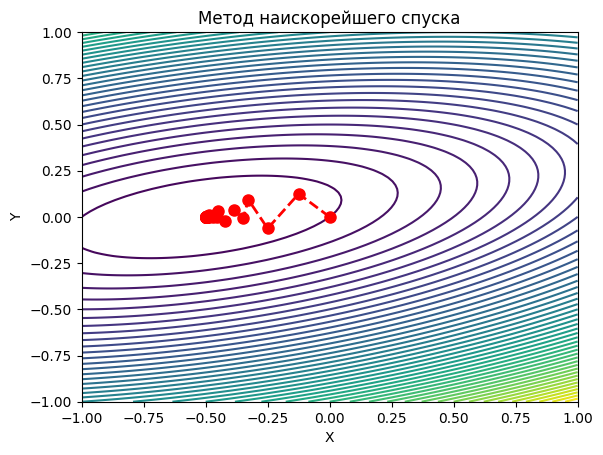

In [12]:
x = np.linspace(-1, 1, 100)
y = np.linspace(-1, 1, 100)
X, Y = np.meshgrid(x, y)
Z = f(np.vstack([X.ravel(), Y.ravel()])).reshape(X.shape)

plt.contour(X, Y, Z, levels=50, cmap='viridis')
plt.plot(trajectory[:, 0], trajectory[:, 1], marker='o', linestyle='dashed', linewidth=2, markersize=8, color='r')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Метод наискорейшего спуска')
plt.show()
